Name: Shreyas Dongre   
Roll no: 082          
Stream: CS (AI)      
Division: I                         
Semester: 5th Semester                                           
Batch: I-3            
                                                                       Date: 27/9/2022       
Subject: DL
###Assignment-8

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
from google.colab import drive
drive.mount('/content/drive')

testp1 = "/content/drive/MyDrive/test"
trainp2 = "/content/drive/MyDrive/train"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
train_data_dir = testp1
validation_data_dir = trainp2

In [14]:
img_width, img_height = 224,224

In [15]:
train_samples = 300
validation_samples = 100

In [16]:
#pre proc train and test data
from keras.preprocessing.image import ImageDataGenerator

train_preprocess = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.25, horizontal_flip=True)

In [17]:
test_preprocess = ImageDataGenerator(1./255)

In [18]:
train_data = train_preprocess.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=16)

Found 100 images belonging to 2 classes.


In [19]:
train_data

In [20]:
train_data[0][0][0].shape

(224, 224, 3)

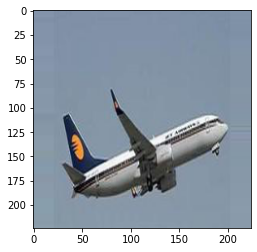

In [21]:
plt.imshow(train_data[0][0][0])

In [22]:
validation_data = test_preprocess.flow_from_directory(validation_data_dir, target_size=(img_width, img_height), batch_size=16)

Found 409 images belonging to 2 classes.


In [23]:
validation_data

In [24]:
validation_data[0][0][0].shape

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


(224, 224, 3)

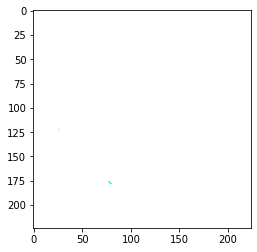

In [25]:
plt.imshow(validation_data[0][0][0])

In [26]:
#Implementing VGG-16 Architecture

In [35]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [36]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [37]:
for layer in vgg.layers:
  layer.trainable = False

In [38]:
x = Flatten()(vgg.output)
prediction = Dense(1, activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [39]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
r = model.fit_generator(train_data,  validation_data=validation_data,epochs=5, steps_per_epoch=len(train_data),validation_steps=len(validation_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
7/7 [==============================] - 292s 47s/step - loss: 1.0146 - accuracy: 0.5000 - val_loss: 15.6489 - val_accuracy: 0.5000
Epoch 2/5
7/7 [==============================] - 258s 42s/step - loss: 0.8142 - accuracy: 0.5000 - val_loss: 9.6441 - val_accuracy: 0.5000
Epoch 3/5
7/7 [==============================] - 265s 43s/step - loss: 0.7712 - accuracy: 0.5000 - val_loss: 11.4327 - val_accuracy: 0.5000
Epoch 4/5
7/7 [==============================] - 261s 42s/step - loss: 0.7324 - accuracy: 0.5000 - val_loss: 9.1683 - val_accuracy: 0.5000
Epoch 5/5
7/7 [==============================] - 261s 42s/step - loss: 0.7352 - accuracy: 0.5000 - val_loss: 8.3757 - val_accuracy: 0.5000


#Conclusion:
1) Imported data for network (train, validation data) in batches for fast and efficiet computation.                         
2) Built VGG-15 architecture and trained network to classify vehicles as airplane/cars.                     
3) With just 5 epoch we were able to get 50% accuracy. Increasing number of epoch will help increase accuracy even more.